#Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Dataset

In [ ]:
import io
#df2 = pd.read_csv('laptop_price.csv')
df2=pd.read_csv('laptop_price.csv',encoding='latin-1')

#Dispaying the data

In [ ]:
df2.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for path
import os


#Information about all the collumns in the Dataset

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Here No Null Values are there in this data set.

#Description of Data

In [ ]:
df2.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


#Corelation between Data

In [ ]:
df2.corr()

,laptop_ID,Inches,Price_euros
laptop_ID,1.000000,-0.087796,0.067830
Inches,-0.087796,1.000000,0.068197
Price_euros,0.067830,0.068197,1.000000


#Shape of the Dataset

In [ ]:
df2.shape

(1303, 13)

#Heatmap of the Dataset

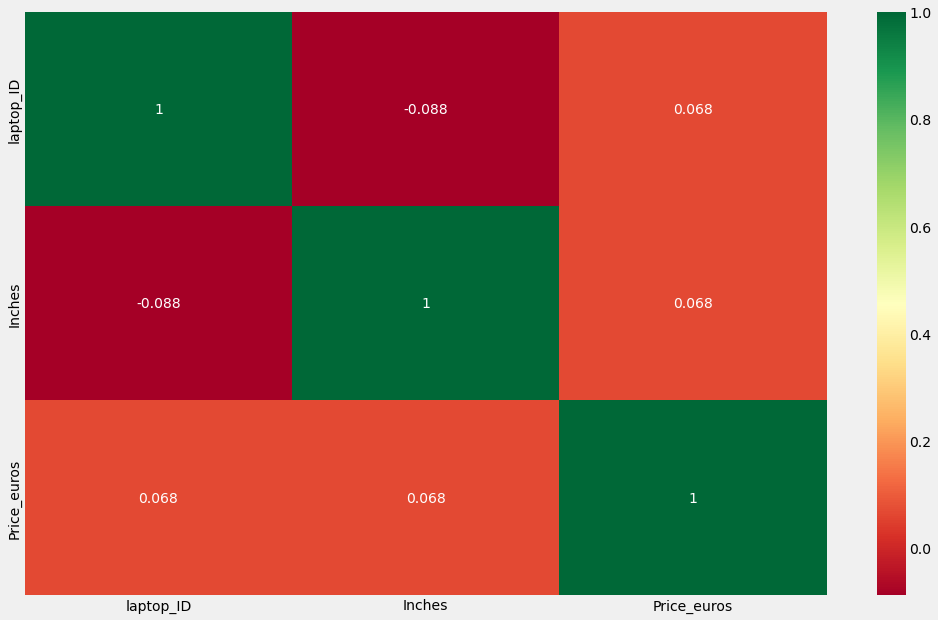

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df2.corr(), annot=True,cmap ='RdYlGn')

#Data Prediction
<br><br>
#Linear Regression 
Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.
y=ax+c



In [ ]:
import io
#df2 = pd.read_csv('laptop_price.csv')
df=pd.read_csv('laptop_price.csv',encoding='latin-1')

In [ ]:
df.drop(['Cpu','Weight','laptop_ID','OpSys','Inches','ScreenResolution','Memory','Gpu'],inplace=True,axis=1)
df

,Company,Product,TypeName,Ram,Price_euros
0,Apple,MacBook Pro,Ultrabook,8GB,1339.69
1,Apple,Macbook Air,Ultrabook,8GB,898.94
2,HP,250 G6,Notebook,8GB,575.00
3,Apple,MacBook Pro,Ultrabook,16GB,2537.45
4,Apple,MacBook Pro,Ultrabook,8GB,1803.60
...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,4GB,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16GB,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,2GB,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,6GB,764.00


Here we have to delete some entities from the dataset for obtaining the better result.

#Importing the modules from sklearn

In [ ]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,VotingRegressor
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

#Label Encoder

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [ ]:
le={}
for col in set(df.columns).difference({'Price_euros'}):
    le[col] = LabelEncoder()
    df[col]  = le[col].fit_transform(df[col])
df

,Company,Product,TypeName,Ram,Price_euros
0,1,300,4,8,1339.69
1,1,301,4,8,898.94
2,7,50,3,8,575.00
3,1,300,4,1,2537.45
4,1,300,4,8,1803.60
...,...,...,...,...,...
1298,10,580,0,5,638.00
1299,10,588,0,1,1499.00
1300,10,196,3,3,229.00
1301,7,2,3,7,764.00


#Feature Scaling
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [ ]:
def normalize_col(col_name):
    return (df[col_name] - df[col_name].min())/(df[col_name].max()-df[col_name].min())

for col in ['Product','Price_euros']:
    df[col]=normalize_col(col) 
df

,Company,Product,TypeName,Ram,Price_euros
0,1,0.486224,4,8,0.196741
1,1,0.487844,4,8,0.122353
2,7,0.081037,3,8,0.067679
3,1,0.486224,4,1,0.398895
4,1,0.486224,4,8,0.275038
...,...,...,...,...,...
1298,10,0.940032,0,5,0.078312
1299,10,0.952998,0,1,0.223629
1300,10,0.317666,3,3,0.009283
1301,7,0.003241,3,7,0.099578


#Splitting into test and training set

In [ ]:
#x=df.drop('Price_euros',axis=1)
#y=df.Price_euros
x = df.iloc[:, -4:-3].values
y = df.iloc[:, -1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

Here we split the data into training and testing set.

In [ ]:
x

array([[0.48622366],
       [0.48784441],
       [0.08103728],
       ...,
       [0.31766613],
       [0.00324149],
       [0.92058347]])

#Training on Training Set using Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Prediction on test set

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([0.14467848, 0.18281771, 0.15784655, 0.16354736, 0.14997783,
       0.16427   , 0.13849591, 0.15816772, 0.14042294, 0.17229931,
       0.1432332 , 0.16418971, 0.17237961, 0.18073009, 0.15921153,
       0.14524053, 0.16386854, 0.18265713, 0.16691967, 0.14339379,
       0.15431365, 0.15367131, 0.18273742, 0.16820436, 0.16089769,
       0.15471512, 0.17551104, 0.15134281, 0.15230633, 0.14074412,
       0.13897767, 0.17446723, 0.17278107, 0.16748173, 0.16828466,
       0.17109492, 0.15367131, 0.15134281, 0.15110193, 0.17334312,
       0.18265713, 0.1514231 , 0.16346707, 0.15656186, 0.18073009,
       0.13849591, 0.16162033, 0.18169361, 0.18137244, 0.18073009,
       0.14732815, 0.15784655, 0.15929183, 0.1607371 , 0.16828466,
       0.14724786, 0.1490946 , 0.15439395, 0.14516024, 0.16410942,
       0.16651821, 0.16683938, 0.16675909, 0.16274443, 0.13970031,
       0.16812407, 0.14034265, 0.1421091 , 0.13897767, 0.1817739 ,
       0.15688303, 0.14580258, 0.15768597, 0.15993417, 0.14973

#Visualizing the Training Set

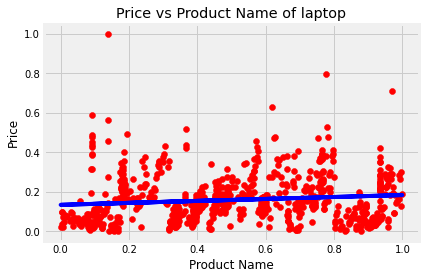

In [ ]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title("Price vs Product Name of laptop")
plt.xlabel("Product Name")
plt.ylabel("Price")
plt.show()

We can see that the datapoints are far away from the linear line. It proves that linear regression is not apt to fit with the datapoints.so now we have to look around another method for creating the best fit model.

#Visualising Testing Set

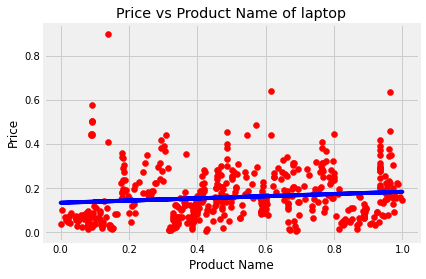

In [ ]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title("Price vs Product Name of laptop")
plt.xlabel("Product Name")
plt.ylabel("Price")
plt.show()

In [ ]:
 regressor.predict([[0.486224	]])

array([0.15856921])

#Multiple Regression
Multiple Linear Regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data. The steps to perform multiple linear Regression are almost similar to that of simple linear Regression. The Difference Lies in the evaluation. We can use it to find out which factor has the highest impact on the predicted output and now different variables relate to each other.<br><br>
Here : Y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + …… bn * xn 
Y = Dependent variable and x1, x2, x3, …… xn = multiple independent variables 

In [ ]:
import io
#df2 = pd.read_csv('laptop_price.csv')
df1=pd.read_csv('laptop_price.csv',encoding='latin-1')

In [ ]:
df1.drop(['Cpu','Weight','laptop_ID','OpSys','Inches','ScreenResolution','Memory','Gpu'],inplace=True,axis=1)
df1

,Company,Product,TypeName,Ram,Price_euros
0,Apple,MacBook Pro,Ultrabook,8GB,1339.69
1,Apple,Macbook Air,Ultrabook,8GB,898.94
2,HP,250 G6,Notebook,8GB,575.00
3,Apple,MacBook Pro,Ultrabook,16GB,2537.45
4,Apple,MacBook Pro,Ultrabook,8GB,1803.60
...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,4GB,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16GB,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,2GB,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,6GB,764.00


#Lable Encoding 

In [ ]:
le={}
for col in set(df.columns).difference({'Price_euros'}):
    le[col] = LabelEncoder()
    df1[col]  = le[col].fit_transform(df1[col])
df1

,Company,Product,TypeName,Ram,Price_euros
0,1,300,4,8,1339.69
1,1,301,4,8,898.94
2,7,50,3,8,575.00
3,1,300,4,1,2537.45
4,1,300,4,8,1803.60
...,...,...,...,...,...
1298,10,580,0,5,638.00
1299,10,588,0,1,1499.00
1300,10,196,3,3,229.00
1301,7,2,3,7,764.00


#Feature Scaling 

In [ ]:
def normalize_col(col_name):
    return (df1[col_name] - df1[col_name].min())/(df1[col_name].max()-df1[col_name].min())

for col in ['Product','Price_euros']:
    df1[col]=normalize_col(col) 
df1

,Company,Product,TypeName,Ram,Price_euros
0,1,0.486224,4,8,0.196741
1,1,0.487844,4,8,0.122353
2,7,0.081037,3,8,0.067679
3,1,0.486224,4,1,0.398895
4,1,0.486224,4,8,0.275038
...,...,...,...,...,...
1298,10,0.940032,0,5,0.078312
1299,10,0.952998,0,1,0.223629
1300,10,0.317666,3,3,0.009283
1301,7,0.003241,3,7,0.099578


In [ ]:
x = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

#Splitting into test and training set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

#Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision= 3)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))

[[0.122 0.047]
 [0.13  0.094]
 [0.235 0.153]
 [0.139 0.148]
 [0.125 0.291]
 [0.139 0.142]
 [0.104 0.098]
 [0.157 0.08 ]
 [0.117 0.019]
 [0.16  0.302]
 [0.117 0.226]
 [0.139 0.107]
 [0.184 0.408]
 [0.136 0.203]
 [0.134 0.136]
 [0.189 0.215]
 [0.171 0.171]
 [0.162 0.2  ]
 [0.137 0.146]
 [0.149 0.156]
 [0.117 0.105]
 [0.148 0.065]
 [0.204 0.305]
 [0.136 0.207]
 [0.192 0.089]
 [0.191 0.19 ]
 [0.196 0.054]
 [0.138 0.063]
 [0.139 0.139]
 [0.171 0.141]
 [0.191 0.503]
 [0.153 0.075]
 [0.161 0.111]
 [0.18  0.135]
 [0.21  0.316]
 [0.191 0.066]
 [0.116 0.107]
 [0.17  0.049]
 [0.17  0.03 ]
 [0.161 0.172]
 [0.162 0.127]
 [0.17  0.04 ]
 [0.17  0.092]
 [0.151 0.098]
 [0.136 0.207]
 [0.144 0.074]
 [0.206 0.188]
 [0.268 0.224]
 [0.194 0.19 ]
 [0.242 0.291]
 [0.154 0.16 ]
 [0.161 0.117]
 [0.234 0.283]
 [0.152 0.122]
 [0.167 0.207]
 [0.154 0.154]
 [0.23  0.418]
 [0.132 0.15 ]
 [0.114 0.131]
 [0.171 0.086]
 [0.211 0.274]
 [0.137 0.192]
 [0.211 0.329]
 [0.184 0.486]
 [0.116 0.067]
 [0.167 0.274]
 [0.085 0.

#Visualising the Results

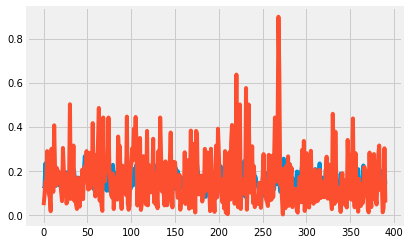

In [ ]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()

Here we have applied multiple linear regression model on the dataset. We can visualise that at some region the orange graph lines are steeper than the blue graph lines.This proves that multiple regression model fits better than the linear regression model but still it is not the best fitted plot as because some predictions has crossed the test values.


#Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.Random decision forests correct for decision trees' habit of overfitting to their training set 587–588  Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance.

In [ ]:
import io
#df2 = pd.read_csv('laptop_price.csv')
dfam=pd.read_csv('laptop_price.csv',encoding='latin-1')

In [ ]:
dfam.drop(['Cpu','Weight','laptop_ID','OpSys','Inches','ScreenResolution','Memory','Gpu'],inplace=True,axis=1)
dfam

,Company,Product,TypeName,Ram,Price_euros
0,Apple,MacBook Pro,Ultrabook,8GB,1339.69
1,Apple,Macbook Air,Ultrabook,8GB,898.94
2,HP,250 G6,Notebook,8GB,575.00
3,Apple,MacBook Pro,Ultrabook,16GB,2537.45
4,Apple,MacBook Pro,Ultrabook,8GB,1803.60
...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,4GB,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16GB,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,2GB,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,6GB,764.00


In [ ]:
le={}
for col in set(dfam.columns).difference({'Price_euros'}):
    le[col] = LabelEncoder()
    dfam[col]  = le[col].fit_transform(dfam[col])
dfam

,Company,Product,TypeName,Ram,Price_euros
0,1,300,4,8,1339.69
1,1,301,4,8,898.94
2,7,50,3,8,575.00
3,1,300,4,1,2537.45
4,1,300,4,8,1803.60
...,...,...,...,...,...
1298,10,580,0,5,638.00
1299,10,588,0,1,1499.00
1300,10,196,3,3,229.00
1301,7,2,3,7,764.00


In [ ]:
def normalize_col(col_name):
    return (dfam[col_name] - dfam[col_name].min())/(dfam[col_name].max()-dfam[col_name].min())

for col in ['Product','Price_euros']:
    dfam[col]=normalize_col(col) 
dfam

,Company,Product,TypeName,Ram,Price_euros
0,1,0.486224,4,8,0.196741
1,1,0.487844,4,8,0.122353
2,7,0.081037,3,8,0.067679
3,1,0.486224,4,1,0.398895
4,1,0.486224,4,8,0.275038
...,...,...,...,...,...
1298,10,0.940032,0,5,0.078312
1299,10,0.952998,0,1,0.223629
1300,10,0.317666,3,3,0.009283
1301,7,0.003241,3,7,0.099578


In [ ]:
X = dfam.iloc[:, -4:-3].values
y = dfam.iloc[:, -1].values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 95, random_state = 78)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=95, n_jobs=None, oob_score=False,
                      random_state=78, verbose=0, warm_start=False)

In [ ]:
regressor.predict([[0.003241]])

array([0.096])

By using random forest model we get an accuracy of 96 percent which is a good result for prediction.

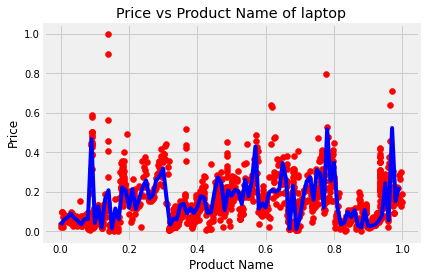

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title("Price vs Product Name of laptop")
plt.xlabel("Product Name")
plt.ylabel("Price")
plt.show()

In this random forest prediction is more accurate and cover most of the data points.The accuracy of this model is 96 percent. So this model fits far better than previous two  models.

#Decision Tree
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 45)
regressor.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=45, splitter='best')

In [ ]:
regressor.predict([[0.003241]])

array([0.1])

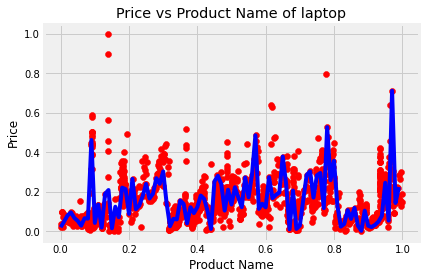

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title("Price vs Product Name of laptop")
plt.xlabel("Product Name")
plt.ylabel("Price")
plt.show()

In decision tree model the accuracy is very high than linear and multiple regression.So we can that this model is also one of the best fitted model.

# Support  Vector Regression Model
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. Developed at AT&T Bell Laboratories by Vladimir Vapnik with colleagues (Boser et al., 1992, Guyon et al., 1993, Vapnik et al., 1997) SVMs are one of the most robust prediction methods, being based on statistical learning frameworks or VC theory proposed by Vapnik (1982, 1995) and Chervonenkis (1974). Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

When data are unlabelled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The support-vector clustering algorithm, created by Hava Siegelmann and Vladimir Vapnik, applies the statistics of support vectors, developed in the support vector machines algorithm, to categorize unlabeled data, and is one of the most widely used clustering algorithms in industrial applications.

In [ ]:
y = y.reshape(len(y), 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
regressor.predict([[0.003241]])

array([-0.071])

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([0.189])

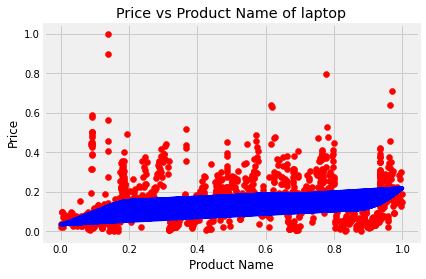

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title("Price vs Product Name of laptop")
plt.xlabel("Product Name")
plt.ylabel("Price")
plt.show()

In SVM we are deviding the data points in 2 plane.In the middle the blue colored plane is called hyperplane. But unfortunately this model is not the best fitted model as per our visualisation.